# Importing requisite packages

In [1]:
from os.path import join
import mne
from mne.preprocessing import ICA

# Loading a preprocessed file and plotting

Opening raw data file ../Data/DASS21-Leah-10-01-2018_20180110_032644_fil/Q011_Q02B_raw.fif...
Isotrak not found
    Range : 25514 ... 30514 =     25.514 ...    30.514 secs
Ready.
Reading 0 ... 5000  =      0.000 ...     5.000 secs...


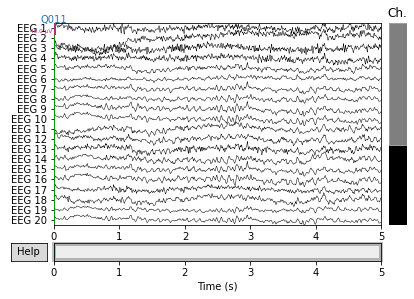

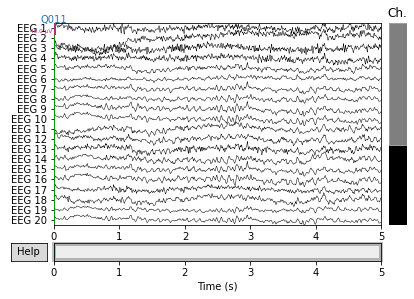

In [2]:
data_folder = join('..', 'Data', 'DASS21-Leah-10-01-2018_20180110_032644_fil')
data_raw_file = join(data_folder, 'Q011_Q02B_raw.fif')

raw = mne.io.read_raw_fif(data_raw_file, preload=True)
raw.plot(title='Raw plot', block=True)

In [3]:
ica = ICA(n_components=32, random_state=97)
ica.fit(raw)

Fitting ICA to data using 33 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 32 components
Fitting ICA took 0.8s.


<ICA  |  raw data decomposition, fit (fastica): 5001 samples, 32 components, channels used: "eeg">

# Plotting ICA components

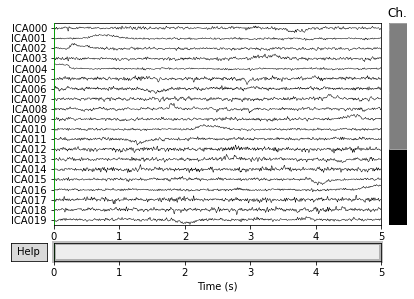

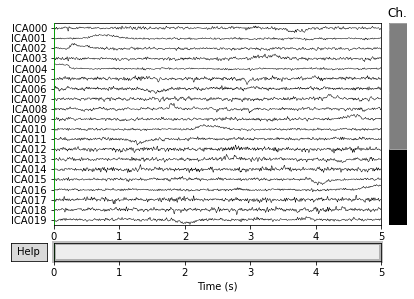

In [4]:
ica.plot_sources(raw, title='ICA components', block=True)

'''
After the ICA components have been plotted, one only needs to
select the components that are to be excluded from the process
of signal reconstruction
'''

In [6]:
reconst_raw = raw.copy()    # Creating a copy of the initial raw file
ica.apply(reconst_raw)      # Applying ICA to the copy

Transforming to ICA space (32 components)
Zeroing out 2 ICA components


<Raw | Q011_Q02B_raw.fif, 33 x 5001 (5.0 s), ~1.3 MB, data loaded>

# Plotting reconstructed signal

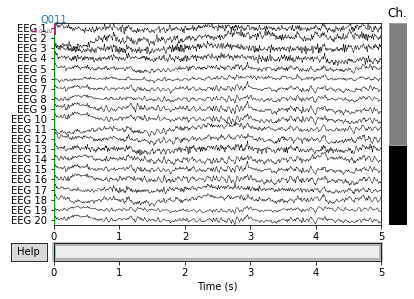

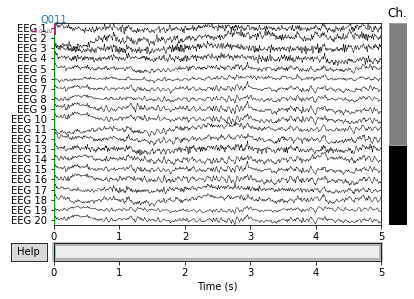

In [7]:
reconst_raw.plot(title='Reconstructed signal using ICA components', block=True)